In [2]:
import os
from nilearn import signal as sgl
from nilearn import image as img
from nilearn import plotting as plot
from nilearn import datasets
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bids
%matplotlib inline

In [3]:
# Import atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
atlas_img, labels = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# Load the functional datasets
layout = bids.BIDSLayout('/Volumes/Seagate_Desktop_Drive/mfc/derivatives/denoise/',validate=False)

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [4]:
# Define parcellation and preprocessing masker

from nilearn import input_data

masker = input_data.NiftiLabelsMasker(labels_img=atlas.maps,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True,
                                      #smoothing_fwhm=5.0,
                                     high_pass = 0.009,
                                     t_r=2)

In [5]:
subjects = layout.get_subjects()

In [6]:
tasks = layout.get_tasks()

In [18]:
subjects[1]

'mfcc006'

In [22]:
## Test directory - pull func img
# func_file = layout.get(subject=subjects[1], task=tasks[1], suffix='bold',extension='.nii.gz',space='MNI152NLin6Asym')
# func_mni = func_file[0].path
# func_img = img.load_img(func_mni)
# func_img

In [43]:
# confound_file = layout.get(subject=subjects[6], extension='.tsv', task=tasks[0], suffix='confounds')
# confound_file = confound_file[1]
# confound_df = pd.read_csv(confound_file, delimiter = '\t').fillna(0)
# # confounds = confound_df.filter(regex='[rot,trans]_[xyz]$|[rot,trans]_[xyz]_derivative1$|a_comp_cor_0[0-1]|global_signal$|csf$|white_matter$')
# confounds = confound_df.filter(regex='global_signal$|csf$|white_matter$')

In [44]:
confounds

,global_signal
0,389.290305
1,388.152832
2,387.748547
3,387.667272
4,387.482435
...,...
142,388.191058
143,388.018908
144,387.519961
145,387.054556


In [45]:
from nilearn.input_data import NiftiLabelsMasker

all_subjects = []
ctrl_subjects = []; medt_subjects = []; n_tasks = [];   h_tasks = []
ctrl_neut = [];     ctrl_heat = [];     medt_neut = []; medt_heat = []
ctrl_premanip_neut = []; ctrl_premanip_heat = []; ctrl_posmanip_neut = []; ctrl_posmanip_heat = []
medt_premanip_neut = []; medt_premanip_heat = []; medt_posmanip_neut = []; medt_posmanip_heat = []

for sub in subjects:
    for tk in tasks:
        func_file = layout.get(subject=sub, task=tk, suffix='bold',extension='.nii.gz',space='MNI152NLin6Asym')
        func_mni = func_file[0].path
        func_img = img.load_img(func_mni)
        
        confound_file = layout.get(subject=sub, extension='.tsv', task=tk, suffix='confounds')
        confound_file = confound_file[1]
        confound_df = pd.read_csv(confound_file, delimiter = '\t').fillna(0)
        # confounds = confound_df.filter(regex='[rot,trans]_[xyz]$|[rot,trans]_[xyz]_derivative1$|a_comp_cor_0[0-1]|global_signal$|csf$|white_matter$')
        confounds = confound_df.filter(regex='global_signal$|csf$|white_matter$')

        time_series = masker.fit_transform(func_img, confounds)
        
        all_subjects.append(time_series)
        
        pre_list = ['1','2']
        pos_list = ['3','4']
        
        if sub.startswith('mfcc'):
            ctrl_subjects.append(time_series)
        if sub.startswith('mfcm'):
            medt_subjects.append(time_series)
        if tk.startswith('h'):
            h_tasks.append(time_series)
        if tk.startswith('n'):
            n_tasks.append(time_series)
        if sub.startswith('mfcc') and tk.startswith('n'):
            ctrl_neut.append(time_series)
        if sub.startswith('mfcc') and tk.startswith('h'):
            ctrl_heat.append(time_series)
        if sub.startswith('mfcm') and tk.startswith('n'):
            medt_neut.append(time_series)
        if sub.startswith('mfcm') and tk.startswith('h'):
            medt_heat.append(time_series)
        if sub.startswith('mfcc') and tk.startswith('n') and tk.endswith(tuple(pre_list)):
            ctrl_premanip_neut.append(time_series)
        if sub.startswith('mfcc') and tk.startswith('n') and tk.endswith(tuple(pos_list)):
            ctrl_posmanip_neut.append(time_series)
        if sub.startswith('mfcc') and tk.startswith('h') and tk.endswith(tuple(pre_list)):
            ctrl_premanip_heat.append(time_series)
        if sub.startswith('mfcc') and tk.startswith('h') and tk.endswith(tuple(pos_list)):
            ctrl_posmanip_heat.append(time_series)
        if sub.startswith('mfcm') and tk.startswith('n') and tk.endswith(tuple(pre_list)):
            medt_premanip_neut.append(time_series)
        if sub.startswith('mfcm') and tk.startswith('n') and tk.endswith(tuple(pos_list)):
            medt_posmanip_neut.append(time_series)
        if sub.startswith('mfcm') and tk.startswith('h') and tk.endswith(tuple(pre_list)):
            medt_premanip_heat.append(time_series)
        if sub.startswith('mfcm') and tk.startswith('h') and tk.endswith(tuple(pos_list)):
            medt_posmanip_heat.append(time_series)

[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a9d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       373.576864
1       372.003528
2       371.328973
3       371.853636
4       371.498570
..             ...
142  

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829a30>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.593752
1       389.079598


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5eb80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.951302
1       379.682429


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a307f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       378.646054
1       376.924390


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfb34cb50>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.268412
1       385.158055


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0100>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       383.187600
1       382.252775


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3af10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a3ac70>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.293394
1       380.969572


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30fd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc277550>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       378.160820
1       377.961162


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829220>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       360.303199
1       359.768637


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30730>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       358.426407
1       356.738467


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377ca0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       359.354322
1       358.141035


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377af0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       356.905410
1       355.317930


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28291c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28291f0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       361.916813
1       361.023652


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28290a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       355.510791
1       355.294765


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a400>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       362.321331
1       360.968436


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30580>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       357.204600
1       356.285921


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30fd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       423.973300
1       423.199339


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e4c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       431.114127
1       428.869191


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e670>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       424.151631
1       422.960179


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a0d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       426.656989
1       424.908170


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57400>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a570a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       430.081097
1       428.954727


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377100>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30a30>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       429.529181
1       427.780725


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829820>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       427.530617
1       424.661404


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e1c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be13775e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       424.856854
1       424.046290


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28290a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334e80>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       350.378579
1       349.921732


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30880>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       348.186956
1       347.117699


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.2s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829df0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0100>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       345.563355
1       344.780851


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30580>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28290a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       347.166353
1       346.180486


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a910>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       351.174544
1       350.299304


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e520>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       348.325238
1       347.071944


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3afd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       349.095509
1       347.561347


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a2e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0100>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       344.297570
1       343.669186


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc334e20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       349.907117
1       349.914379


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aee0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       345.783142
1       345.227247


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a790>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.927666
1       342.981616


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.791847
1       340.963157


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e6a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be13771c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       351.182756
1       349.784524


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377100>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       347.896544
1       347.807809


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a570a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.540236
1       340.295262


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30760>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334f10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       341.928675
1       340.948298


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3af40>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377dc0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.300624
1       367.806673


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a571f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       365.923304
1       365.447909


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a576a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a570d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.119430
1       365.022580


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a4f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334e20>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.862356
1       367.722351


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.536579
1       367.734490


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377220>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       365.958424
1       365.126799


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a570d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       365.944519
1       363.664858


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30b20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       354.774310
1       354.061391


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829130>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       389.290305
1       388.152832


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377eb0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334f10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.955719
1       389.694486


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e610>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.131309
1       388.885759


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e5b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       389.903949
1       388.400734


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ab80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       392.214262
1       391.003048


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30880>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829310>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.828054
1       389.471109


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a070>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       387.683332
1       385.717246


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829070>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e1c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.037344
1       388.253428


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37aee0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334f10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       417.477973
1       414.421647


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30be0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30550>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       420.179074
1       416.903560


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e4c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       419.022941
1       415.640474


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377130>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       418.186853
1       415.445511


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aac0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e6a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       416.291096
1       415.401877


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377100>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       416.041212
1       414.487826


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ab80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       417.497403
1       410.968335


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ac40>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30b80>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       418.106924
1       415.483887


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a0d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       383.625584
1       382.781715


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5eca0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30940>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       383.514177
1       381.422858


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.2s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37a430>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       382.041346
1       380.731644


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829580>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57160>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.094263
1       379.552333


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a301f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       382.501759
1       381.112111


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ab50>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377dc0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       382.603414
1       381.246432


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30910>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.897864
1       379.881334


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ab50>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       379.480753
1       378.399839


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a308b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57190>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       401.745425
1       402.697606


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30640>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       400.613606
1       398.812872


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ab80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57400>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       396.400676
1       395.225863


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829df0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       397.675516
1       396.039037


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a304f0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       396.892334
1       396.156942


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e700>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37abe0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       394.229311
1       392.398614


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a1f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       398.517489
1       397.026090


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aeb0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       398.669030
1       398.949866


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a220>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       433.380187
1       431.564367


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a640>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       437.537512
1       435.018492


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d90>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       431.931388
1       429.147619


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a575e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28293d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       429.309658
1       427.214332


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be13775e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       435.151446
1       433.504258


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57220>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a576a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       431.445373
1       430.016941


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57070>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0100>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       433.700541
1       430.644846


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2f0490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829760>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       428.456342
1       427.270464


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be13775e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       338.498586
1       337.413297


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30ca0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.674711
1       341.930367


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a2e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       340.273434
1       339.214204


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57250>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.498009
1       341.727108


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829460>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829a60>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       337.631795
1       335.313423


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829790>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e460>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       338.504690
1       337.585861


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28296a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.973717
1       342.298092


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a370>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       338.104045
1       337.670473


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a760>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       344.396028
1       341.950019


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377e80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be13773d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.460005
1       343.368416


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57400>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       344.639498
1       343.323550


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e880>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       339.881432
1       338.530030


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28293d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37abe0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       337.987830
1       336.956350


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30940>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e700>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       340.794585
1       341.017726


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829520>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       341.127935
1       340.076816


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28296a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       345.473784
1       345.008078


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfb341850>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a570a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       377.104418
1       375.339584


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e730>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       378.544467
1       376.797653


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30b20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.193954
1       377.973979


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       377.777344
1       376.022497


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a8e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       378.009542
1       376.948558


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       374.866974
1       373.536954


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e700>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57370>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.444209
1       381.381202


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa30>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       376.419417
1       376.208067


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       364.837872
1       363.157138


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5eb80>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       362.369030
1       360.536268


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829310>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       363.365300
1       360.736128


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a2e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       359.717700
1       358.401169


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a575e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       363.080463
1       361.715341


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37a970>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       359.740519
1       360.835546


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e880>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       358.871106
1       356.681795


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5eb80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       360.477469
1       358.966812


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30790>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377940>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.274728
1       385.713881


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc334fa0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       388.862364
1       388.115634


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d30>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e730>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.806322
1       384.035115


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57790>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.570920
1       381.110085


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a610>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.151953
1       385.658663


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       379.410303
1       378.630169


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e5b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.984046
1       381.144655


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e4f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5efa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       379.225972
1       378.690758


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a306a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.631737
1       367.184282


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3afa0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       365.659839
1       363.900166


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       363.494230
1       361.915942


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be13775e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.527982
1       365.739026


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30c70>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37aee0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.970344
1       369.239928


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a570a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.255272
1       365.055879


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829af0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.894784
1       364.630893


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a571f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a3a550>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       360.853669
1       359.857465


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30640>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       370.822022
1       368.417433


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       370.952653
1       369.131906


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30a00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       365.565681
1       364.088810


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a575e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.403133
1       367.028800


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ab50>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       361.341135
1       359.596240


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfb3611c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a305e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.196799
1       364.750873


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a610>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       370.051922
1       366.607562


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30910>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.466289
1       365.602317


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2f0100>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       375.186202
1       372.130460


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a6d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.097812
1       366.878172


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       370.436027
1       368.910287


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.686859
1       367.564997


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a301f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377dc0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       371.142022
1       369.572508


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30730>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.683291
1       368.473612


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30fa0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.630827
1       365.666398


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.2s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37abe0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.765244
1       368.927054


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a6a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       409.082134
1       408.352478


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a340>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       408.544325
1       407.370855


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a100>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377400>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       409.963378
1       409.314711


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30580>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28293a0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       406.305791
1       405.876815


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aee0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57190>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       400.571156
1       400.577616


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377b50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       407.768074
1       407.391031


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a7f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       405.759272
1       406.165048


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a2e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       410.744039
1       409.845144


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ae80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       379.906894
1       378.916516


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       382.043866
1       380.286739


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a576a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28298b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       369.027254
1       368.964215


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829130>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       370.018937
1       369.076646


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3af40>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       377.852659
1       376.817282


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28294f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       375.820886
1       374.448212


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e730>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       371.436162
1       370.045295


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28295e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       372.872328
1       371.881730


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e730>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       344.947642
1       344.376572


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37aee0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       338.211904
1       336.597882


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a1f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.251835
1       342.849265


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a307c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377d90>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       340.447531
1       338.390445


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a940>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57160>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.621438
1       342.063011


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a1f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       345.398632
1       344.045953


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aac0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.996415
1       341.996200


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28294f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377940>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.390077
1       339.840630


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ac10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       425.072476
1       422.475091


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829070>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       424.063897
1       421.660241


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be13775e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e7f0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       422.471490
1       420.032867


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a9d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       425.461643
1       422.086728


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       411.106391
1       409.333620


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30b20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       425.325854
1       423.668985


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfb341850>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377c70>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       424.487121
1       420.392634


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30b20>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       423.925211
1       419.869133


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377dc0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       391.354029
1       389.444254


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.787700
1       383.746338


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a700>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.314980
1       380.361588


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d90>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.668528
1       378.518476


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57190>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5efa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       389.777897
1       389.285325


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a6a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfadb02e0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       388.661648
1       386.807421


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ac10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.403957
1       381.928106


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829580>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       378.451014
1       377.048480


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a460>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       383.347388
1       381.894603


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829610>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.706596
1       385.554912


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2a8fd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       377.771608
1       377.165362


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37abe0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.016770
1       381.688605


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57250>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37ad90>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.443730
1       385.676461


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829250>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30c70>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       387.537366
1       386.230651


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37aee0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       383.899596
1       381.443515


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5ef40>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       378.436197
1       376.002391


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ac40>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377c10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.682837
1       379.607252


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0100>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       379.413098
1       377.523719


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37a970>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57790>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       375.346236
1       373.949669


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28294c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       380.444350
1       378.179612


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28290d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       382.802779
1       381.898327


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a730>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57190>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.246067
1       380.382061


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30c10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       376.968500
1       374.587750


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57790>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       373.784822
1       372.823955


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30a90>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829700>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       330.463095
1       329.463004


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e4f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       339.710124
1       339.120556


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377940>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       330.904371
1       330.451115


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3acd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       333.721416
1       332.593230


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377460>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e7f0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       340.723837
1       339.903331


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a820>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       341.375800
1       341.263959


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2f0490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       333.152631
1       333.204399


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a0d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       329.016763
1       328.746461


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829100>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       383.292215
1       381.680014


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28296a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       382.296882
1       381.166667


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a9a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.438407
1       379.547510


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28298e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a430>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.854414
1       385.449908


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e5b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       379.821493
1       379.103715


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57370>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.739253
1       381.194557


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829250>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a305b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.234512
1       380.212796


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30c10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30550>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       381.229912
1       378.795057


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.5s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28290d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       356.662554
1       355.680636


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a9d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377220>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       358.603689
1       357.321514


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aca0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57160>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       353.084274
1       351.047269


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28295b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       348.802611
1       349.224575


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e4f0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       358.147096
1       356.397402


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3afd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       357.210979
1       356.068609


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5ef10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829400>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       352.925902
1       352.609034


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       349.848922
1       350.057136


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       409.252041
1       408.348210


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a550>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       403.444488
1       406.801748


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a250>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       404.400204
1       402.950815


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30c10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       403.728304
1       402.326375


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       402.483545
1       401.955393


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30760>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       405.470841
1       404.623590


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a8b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       407.594246
1       405.374504


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377eb0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb341850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       403.450132
1       403.257805


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ad00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       356.061726
1       355.914428


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a820>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       352.954426
1       352.186264


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e490>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2829550>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       350.341654
1       348.475003


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3afa0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       346.356453
1       344.856911


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a4f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       354.294896
1       353.682415


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a306d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37ad90>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       356.009186
1       353.931803


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30f10>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37abe0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       348.401780
1       348.701577


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377b50>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       345.820249
1       346.574360


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377fd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       342.959837
1       342.477369


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30d60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.723048
1       341.549139


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377f70>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       341.665599
1       339.725455


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829640>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       338.869210
1       337.206548


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3afa0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       344.215607
1       342.961316


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       339.906520
1       338.420056


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57070>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       343.352582
1       341.611546


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       338.328782
1       338.436617


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57250>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       430.105642
1       428.909219


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57790>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377af0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       424.529674
1       422.436787


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30b80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8fd0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       426.525105
1       425.660869


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e670>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       421.779198
1       419.169628


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       430.528381
1       429.947483


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e880>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       424.390011
1       423.626830


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377b50>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be28295b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       422.914270
1       422.198654


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5eb80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       420.530099
1       418.526585


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be13773d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       392.676054
1       391.546571


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2f06d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba070>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       388.329442
1       387.343424


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfb341850>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       387.991419
1       386.481684


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377c70>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37abe0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       388.106659
1       388.154176


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a570a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a30a30>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       392.451417
1       391.108795


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377be0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5ef10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       385.758598
1       386.258339


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30970>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57550>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       386.047915
1       385.102551


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a220>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       384.474330
1       384.392456


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2a8670>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f06d0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.158479
1       368.018407


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a302e0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       371.397339
1       370.586952


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2a8fd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       372.717970
1       370.714483


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37abe0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       366.418559
1       366.252331


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a370>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       371.198007
1       370.627493


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28293a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e5b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       370.959092
1       370.532988


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e670>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       371.769367
1       369.777257


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a57040>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc247c40>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       368.059212
1       366.050715


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e280>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       357.606430
1       357.057668


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e5b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       364.469315
1       362.835751


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829730>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       355.397696
1       355.442762


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28293d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       354.319438
1       354.528565


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28298b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       358.853365
1       359.329563


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829520>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       351.800873
1       351.448205


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377e20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf9d82d00>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       354.548947
1       354.622747


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf6a570d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       354.783935
1       354.087148


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28291c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       393.002524
1       391.054835


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a700>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       394.472117
1       392.542923


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       392.002101
1       392.102343


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28294c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e5b0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.075055
1       387.844734


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a400>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb01dc10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       391.196436
1       388.806039


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829d00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       392.921695
1       392.313155


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3abe0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377e20>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       390.832679
1       390.174145


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377dc0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       387.032824
1       383.921705


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e670>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       412.647559
1       411.772969


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30b20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf699d970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       414.126335
1       413.207937


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37ad90>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       411.988768
1       410.921033


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a820>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2a8670>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       410.554626
1       410.505941


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bf9d82d00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e850>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       415.653470
1       415.564999


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377e80>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc37a970>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       415.948995
1       414.611322


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a307f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57400>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       412.480149
1       410.231212


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be13773d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb3611c0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       404.892269
1       404.981973


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.0s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a8b0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377be0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       436.052157
1       434.575096


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.1s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be28299d0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a3ab80>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       432.235444
1       430.444370


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829310>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       420.362459
1       419.719318


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a307f0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bf6a57190>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       416.049703
1       414.748480


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3ad00>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb34cb50>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       433.375487
1       433.313594


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc37ad90>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be2a3a490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       433.899433
1       431.989638


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfc2a8fd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       419.186957
1       419.621248


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829700>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       417.607503
1       416.341281


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5eca0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfd2b3160>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       350.898891
1       350.040329


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be1377760>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9befa42250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       347.529554
1       346.939322


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3aa60>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfb359ac0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       344.972640
1       343.544810


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.8s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829520>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc334fa0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       349.003599
1       347.063151


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2829910>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9be1377d90>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       347.136523
1       346.725422


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.6s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9bfdb5e4c0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfc2f0490>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       345.517458
1       344.785304


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.7s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a3a0a0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bfdb5e7f0>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       347.945914
1       346.065232


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 10.9s, 0.2min
[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f9be2a30e20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f9bdfeba250>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6.0,
  'standardize': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal
0       346.508501
1       344.411817


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [60]:
len(medt_posmanip_heat)

40

In [21]:
len(medt_subjects)

160

In [46]:
len(all_subjects)

320

In [47]:
# Compute Correlation Matrices, all groups

from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

ctrl_correlation_matrices = correlation_measure.fit_transform(ctrl_subjects)
medt_correlation_matrices = correlation_measure.fit_transform(medt_subjects)

ctrl_neut_correlation_matrices = correlation_measure.fit_transform(ctrl_neut)
ctrl_heat_correlation_matrices = correlation_measure.fit_transform(ctrl_heat)

medt_neut_correlation_matrices = correlation_measure.fit_transform(medt_neut)
medt_heat_correlation_matrices = correlation_measure.fit_transform(medt_heat)

ctrl_premanip_neut_matrices = correlation_measure.fit_transform(ctrl_premanip_neut)
ctrl_premanip_heat_matrices = correlation_measure.fit_transform(ctrl_premanip_heat)
ctrl_posmanip_neut_matrices = correlation_measure.fit_transform(ctrl_posmanip_neut)
ctrl_posmanip_heat_matrices = correlation_measure.fit_transform(ctrl_posmanip_heat)

medt_premanip_neut_matrices = correlation_measure.fit_transform(medt_premanip_neut)
medt_premanip_heat_matrices = correlation_measure.fit_transform(medt_premanip_heat)
medt_posmanip_neut_matrices = correlation_measure.fit_transform(medt_posmanip_neut)
medt_posmanip_heat_matrices = correlation_measure.fit_transform(medt_posmanip_heat)

In [26]:
# Plot

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plot.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)

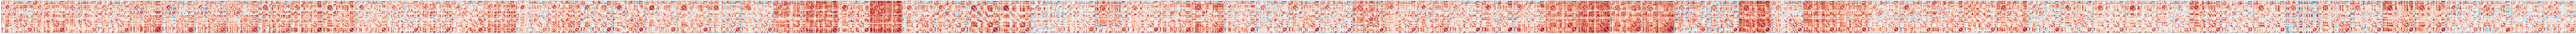

In [27]:
plot_matrices(ctrl_neut_correlation_matrices, 'correlation')

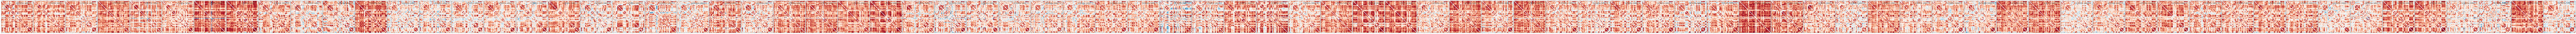

In [28]:
plot_matrices(medt_neut_correlation_matrices, 'correlation')

In [29]:
ctrl_subjects[1].shape
ctrl_correlation_matrices.shape

(160, 48, 48)

In [48]:
# Save correlation matrices as .mat 4D files

import numpy, scipy.io

scipy.io.savemat('ctrl_corr_matrices.mat', mdict={'ctrl_corr_matrices': ctrl_correlation_matrices})
scipy.io.savemat('medt_corr_matrices.mat', mdict={'medt_corr_matrices': medt_correlation_matrices})
scipy.io.savemat('ctrl_heat_corr_matrices.mat', mdict={'ctrl_heat_corr_matrices': ctrl_heat_correlation_matrices})
scipy.io.savemat('ctrl_neut_corr_matrices.mat', mdict={'ctrl_neut_corr_matrices': ctrl_neut_correlation_matrices})
scipy.io.savemat('medt_heat_corr_matrices.mat', mdict={'medt_heat_corr_matrices': medt_heat_correlation_matrices})
scipy.io.savemat('medt_neut_corr_matrices.mat', mdict={'medt_neut_corr_matrices': medt_neut_correlation_matrices})

scipy.io.savemat('ctrl_premanip_neut_matrices.mat', mdict={'ctrl_premanip_neut_corr_matrices': ctrl_premanip_neut_matrices})
scipy.io.savemat('ctrl_premanip_heat_matrices.mat', mdict={'ctrl_premanip_heat_corr_matrices': ctrl_premanip_heat_matrices})
scipy.io.savemat('ctrl_posmanip_neut_matrices.mat', mdict={'ctrl_posmanip_neut_corr_matrices': ctrl_posmanip_neut_matrices})
scipy.io.savemat('ctrl_posmanip_heat_matrices.mat', mdict={'ctrl_posmanip_heat_corr_matrices': ctrl_posmanip_heat_matrices})

scipy.io.savemat('medt_premanip_neut_matrices.mat', mdict={'medt_premanip_neut_corr_matrices': medt_premanip_neut_matrices})
scipy.io.savemat('medt_premanip_heat_matrices.mat', mdict={'medt_premanip_heat_corr_matrices': medt_premanip_heat_matrices})
scipy.io.savemat('medt_posmanip_neut_matrices.mat', mdict={'medt_posmanip_neut_corr_matrices': medt_posmanip_neut_matrices})
scipy.io.savemat('medt_posmanip_heat_matrices.mat', mdict={'medt_posmanip_heat_corr_matrices': medt_posmanip_heat_matrices})

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:30: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


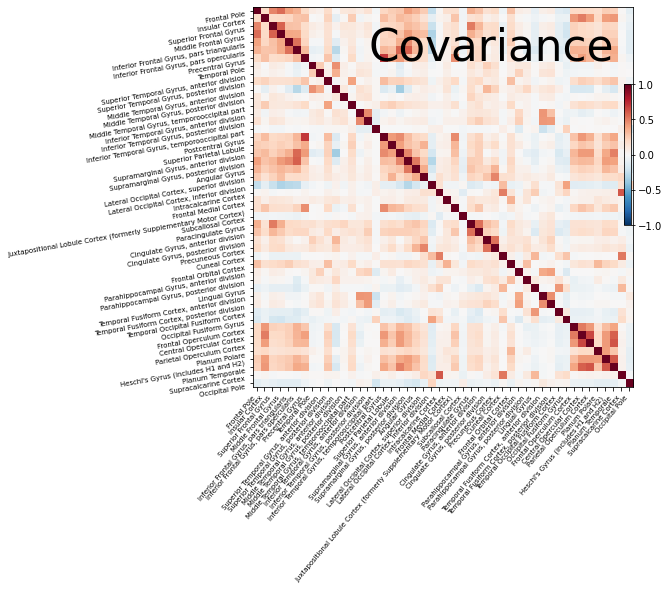

In [48]:
# Compute Sparse Inverse Covariance - 1 subject

try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

estimator = GraphicalLassoCV()
estimator.fit(ctrl_subjects[0])

from nilearn import plotting

#labels=atlas[labels]

# The covariance can be found at estimator.covariance_
plotting.plot_matrix(estimator.covariance_, labels=labels[1:],
                     figure=(9, 7), vmax=1, vmin=-1,
                     title='Covariance')

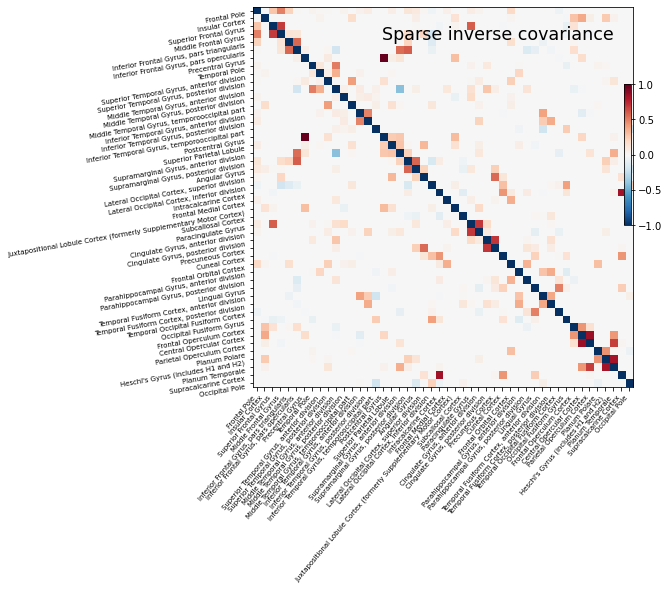

In [34]:
# Sparse inverse covariance - negate to get partial correlations

plotting.plot_matrix(-estimator.precision_, labels=labels[1:],
                     figure=(9, 7), vmax=1, vmin=-1,
                     title='Sparse inverse covariance')

In [52]:
tasks

['h1', 'h2', 'h3', 'h4', 'n1', 'n2', 'n3', 'n4']